# Ajuste Serie datos AirPassengers por medio del modelo ARIMA estacional, así como su correspondiente análisis de residuales y pronósticos

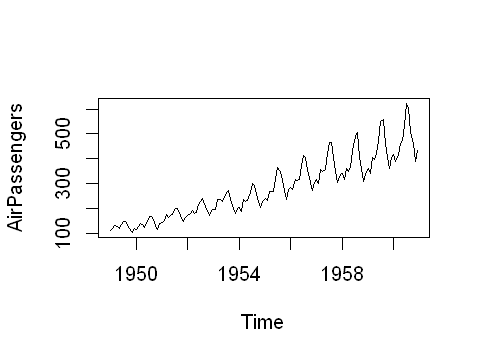

In [2]:
data(AirPassengers)
options(repr.plot.width=4, repr.plot.height=3)
plot(AirPassengers)

Después de haber aplicado la diferencia ordinaria y estacional procedemos a tratar de identificar la estructura de autocorrelación a corto plazo(*ARMA*) y estacional *SARMA*. Para eso, es necesario haber convertido la serie a estacionaria

In [3]:
lAirpassengers=log(AirPassengers)

# Prueba de Dickey Fuller

$H_0:$ *hay presencia de raíz unitaria* vs
$H_1:$ *no hay presencia de raíz unitaria*

In [4]:
options(warn=-1) #suppress warnings globally in an R Script
library(tseries)
tseries::adf.test(lAirpassengers,k=10)


	Augmented Dickey-Fuller Test

data:  lAirpassengers
Dickey-Fuller = -1.3232, Lag order = 10, p-value = 0.8582
alternative hypothesis: stationary


Observaciones: 
* La prueba de la librería *tseries* es sensible al valor de **k** (rezago)
* La serie debe estar estabilizada en varianza

In [5]:
tseries::adf.test(lAirpassengers,k=5)
tseries::adf.test(lAirpassengers,k=9) # a partir del rezago 9 empiezo a no rechazar H0
tseries::adf.test(lAirpassengers,k=12)


	Augmented Dickey-Fuller Test

data:  lAirpassengers
Dickey-Fuller = -6.4215, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  lAirpassengers
Dickey-Fuller = -2.9762, Lag order = 9, p-value = 0.17
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  lAirpassengers
Dickey-Fuller = -1.5325, Lag order = 12, p-value = 0.7711
alternative hypothesis: stationary


## fUnitRoots

In [6]:
library(fUnitRoots)
adfTest(lAirpassengers,lags = 12,type='nc')   ###Hay la presencia de Raíz Unitaria
adfTest(lAirpassengers,lags = 5,type='nc')   
adfTest(lAirpassengers,lags = 1,type='nc')   

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: 3.7872
  P VALUE:
    0.99 

Description:
 Tue Jun 25 19:54:17 2019 by user: FM



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: 1.3817
  P VALUE:
    0.9566 

Description:
 Tue Jun 25 19:54:17 2019 by user: FM



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: 0.674
  P VALUE:
    0.8289 

Description:
 Tue Jun 25 19:54:17 2019 by user: FM


Observaciones: 
* La prueba de la librería **fUnitRoots** es sensible al valor 'ct' del argumento de *type*
    + si *type='ct'* indica que $\phi(B) X_t = c + bt + \theta(B)+Z_t$ (tipo de tendencia como cuadrática)
    + si *type='c'* inidica que $\phi(B) X_t = c+ \theta(B)+Z_t$ (tipo de tendencia lineal constante)

In [7]:
adfTest(lAirpassengers,lags = 12,type='ct') ### Puede también indicar la presencia de una tendencia determinística
adfTest(lAirpassengers,lags = 9,type='ct')   
adfTest(lAirpassengers,lags = 5,type='ct')


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: -1.5325
  P VALUE:
    0.7711 

Description:
 Tue Jun 25 19:54:22 2019 by user: FM



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 9
  STATISTIC:
    Dickey-Fuller: -2.9762
  P VALUE:
    0.17 

Description:
 Tue Jun 25 19:54:22 2019 by user: FM



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -6.4215
  P VALUE:
    0.01 

Description:
 Tue Jun 25 19:54:22 2019 by user: FM


## Urca

In [8]:
library(urca)
summary(ur.df(lAirpassengers, lags = 12))


Attaching package: 'urca'

The following objects are masked from 'package:fUnitRoots':

    punitroot, qunitroot, unitrootTable




############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103864 -0.023652 -0.001455  0.022160  0.126649 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.005439   0.001436   3.787 0.000241 ***
z.diff.lag1  -0.198813   0.072080  -2.758 0.006737 ** 
z.diff.lag2  -0.273730   0.073309  -3.734 0.000292 ***
z.diff.lag3  -0.233607   0.072258  -3.233 0.001589 ** 
z.diff.lag4  -0.293133   0.073926  -3.965 0.000126 ***
z.diff.lag5  -0.206562   0.072058  -2.867 0.004915 ** 
z.diff.lag6  -0.266919   0.071493  -3.734 0.000292 ***
z.diff.lag7  -0.234526   0.071847  -3.264 0.001436 ** 
z.diff.lag8  -0.327393   0.073197  -4.473 1.79e-05 ***
z.diff.lag9  -0.198455   0.073623  -2.696 0.008054 ** 
z.diff.lag10 -0.279931   0.072710  -3.8

Esta prueba estima la significancia de los rezagos como coeficientes de regresión. Por otro lado como el valor del estadístico no es menor que cualquiera de los valores críticos de niveles de significancia usual, entonces no rechazo $H_0$

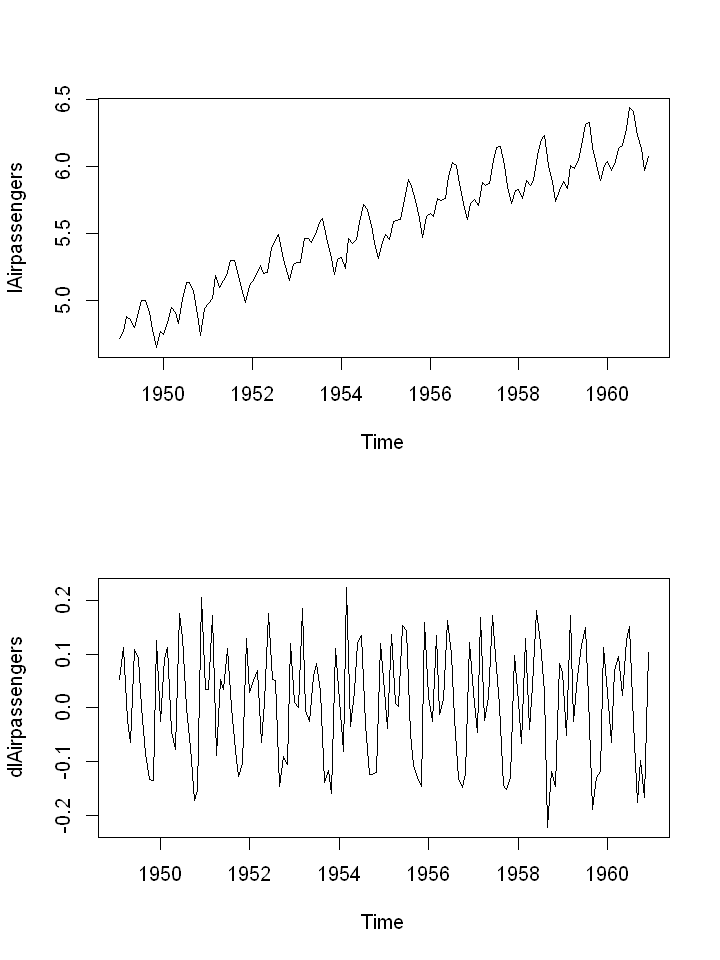

In [9]:
dlAirpassengers=diff(lAirpassengers,lag=1)
options(repr.plot.width=6, repr.plot.height=8)
par(mfrow=c(2,1))
plot(lAirpassengers)
plot(dlAirpassengers)

In [10]:
adfTest(dlAirpassengers,lags = 2,type='nc') ###No se debe diferenciar más


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -7.6337
  P VALUE:
    0.01 

Description:
 Tue Jun 25 19:54:45 2019 by user: FM


#  Ejercicios de Simulación

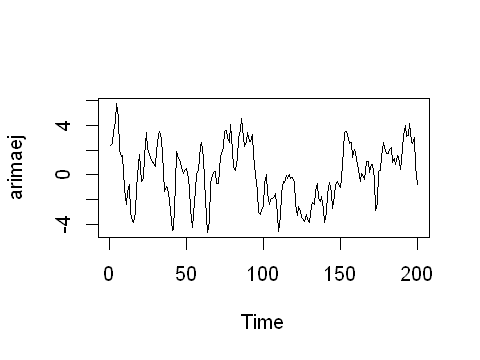

In [11]:
Tlength=200
a0=3
a1=0.5
tiempo=seq(1:Tlength)
xt=a1*tiempo
tendencia=a0+a1*tiempo
drift=a1*rep(1,Tlength)
arimaej=arima.sim(list(order = c(1,0,1), ar = 0.7,ma=0.6), n = Tlength)
options(repr.plot.width=4, repr.plot.height=3) 
plot(arimaej)

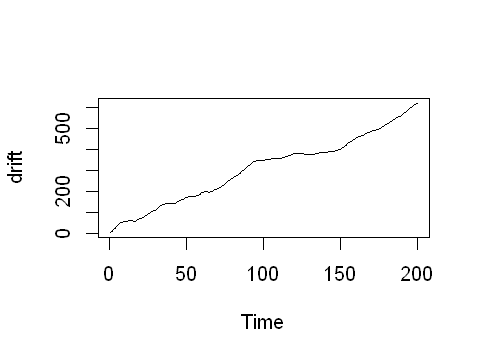

In [12]:
drift=as.ts(cumsum(arimaej+a0))
plot(drift)

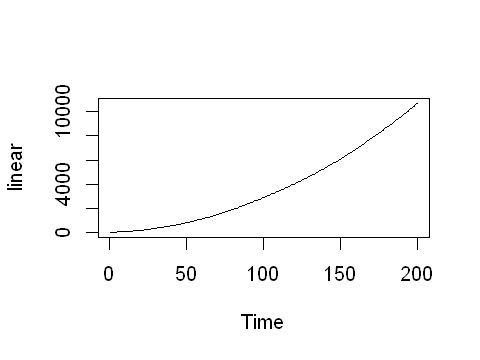

In [13]:
linear=as.ts(cumsum(arimaej+a0+xt))
plot(linear)

In [14]:
adfTest(arimaej,lags = 10,type='nc')   ###No hay presencia de Raíz Unitaria


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -2.7534
  P VALUE:
    0.01 

Description:
 Tue Jun 25 19:56:19 2019 by user: FM


In [15]:
tseries::adf.test(drift)


	Augmented Dickey-Fuller Test

data:  drift
Dickey-Fuller = -1.7666, Lag order = 5, p-value = 0.6739
alternative hypothesis: stationary


In [16]:
adfTest(drift,lags = 10,type='c')


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: 0.2051
  P VALUE:
    0.9716 

Description:
 Tue Jun 25 19:58:51 2019 by user: FM


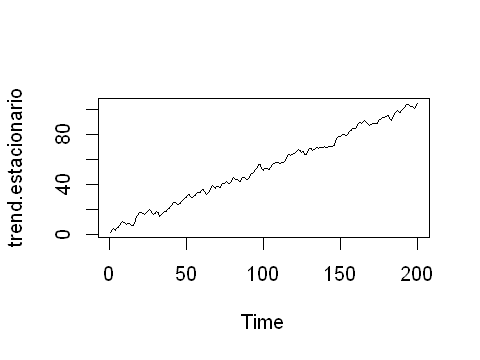

In [18]:
estacionario=arima.sim(list(order = c(1,0,1), ar = 0.7,ma=0.6), n = Tlength)
trend.estacionario=tendencia+estacionario
plot(trend.estacionario)

In [19]:
adfTest(trend.estacionario,lags=10)
adfTest(trend.estacionario,lags=1,type='ct')


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: 3.3146
  P VALUE:
    0.99 

Description:
 Tue Jun 25 20:03:11 2019 by user: FM



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -6.5721
  P VALUE:
    0.01 

Description:
 Tue Jun 25 20:03:11 2019 by user: FM


# Diferencia Estacional(continuación AirPassengers)

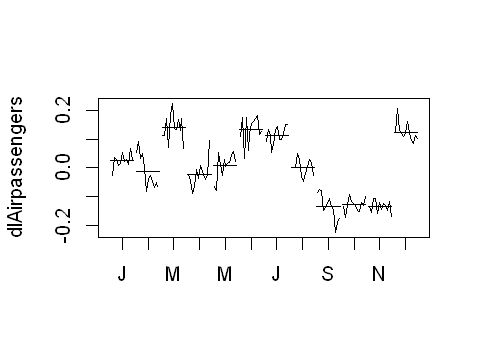

In [22]:
monthplot(dlAirpassengers)

In [25]:
library(forecast)
nsdiffs(dlAirpassengers) # Number of differences required for a seasonally stationary series

[1] 1

In [26]:
nsdiffs(AirPassengers)

[1] 1

In [27]:
DdlAirpassengers=diff(dlAirpassengers,lag=12)

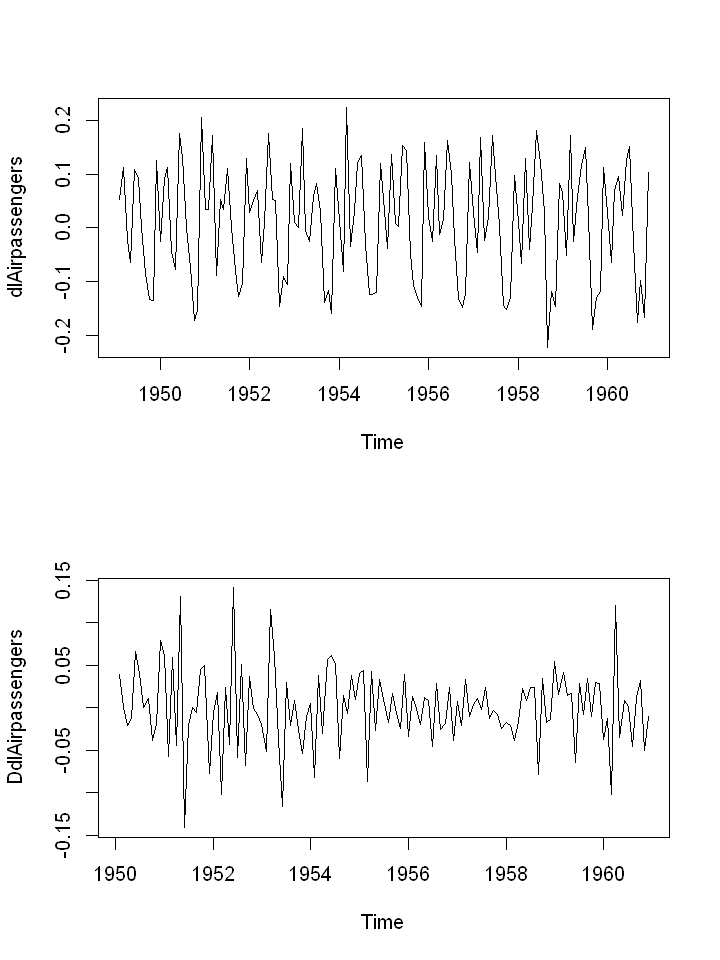

In [34]:
options(repr.plot.width=6, repr.plot.height=8)
par(mfrow=c(2,1))
plot(dlAirpassengers)
plot(DdlAirpassengers)

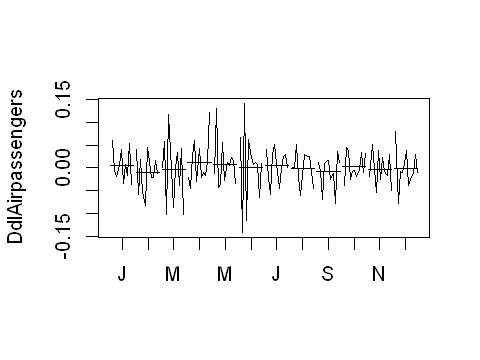

In [35]:
options(repr.plot.width=4, repr.plot.height=3) 
monthplot(DdlAirpassengers)

In [30]:
nsdiffs(DdlAirpassengers)

[1] 0

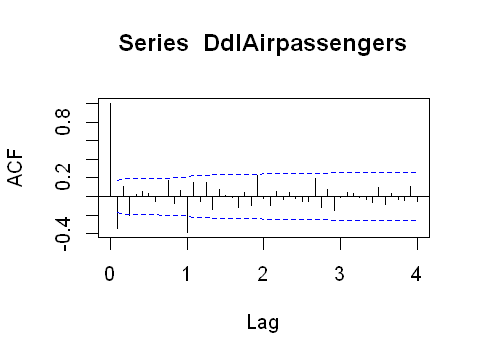

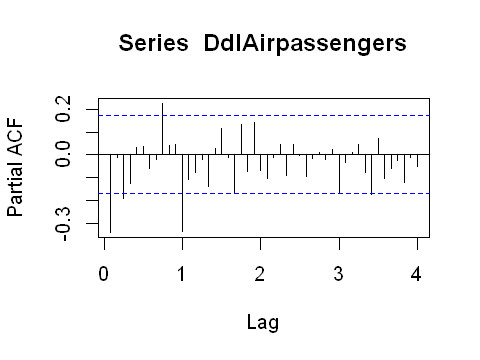

In [32]:
acf(DdlAirpassengers,lag.max = 48, ci.type='ma')
pacf(DdlAirpassengers,lag.max = 48)

## Ajuste del modelo

In [37]:
library(lmtest)
modelo = Arima(AirPassengers, c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12),lambda = 0)
coeftest(modelo) #Modelo MA(1) estacional
modeloalter= Arima(AirPassengers, c(1, 1, 0),seasonal = list(order = c(1, 1, 0), period = 12),lambda = 0)

Loading required package: zoo

Attaching package: 'zoo'

The following object is masked from 'package:timeSeries':

    time<-

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1  -0.401828   0.089644 -4.4825 7.378e-06 ***
sma1 -0.556945   0.073100 -7.6190 2.557e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Análisis de residuales

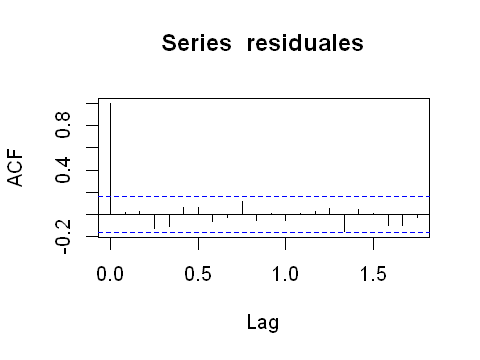

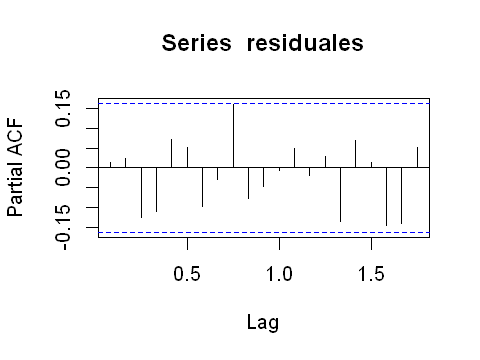

In [38]:
residuales <- modelo$residuals
acf(residuales)
pacf(residuales)

In [39]:
#Test de normalidad
jarque.bera.test(residuales)
#Test de autocorrelación
Box.test(residuales, lag = (length(residuales)/4), type = "Ljung-Box", fitdf = 2)


	Jarque Bera Test

data:  residuales
X-squared = 5.2265, df = 2, p-value = 0.0733



	Box-Ljung test

data:  residuales
X-squared = 37.874, df = 34, p-value = 0.2969


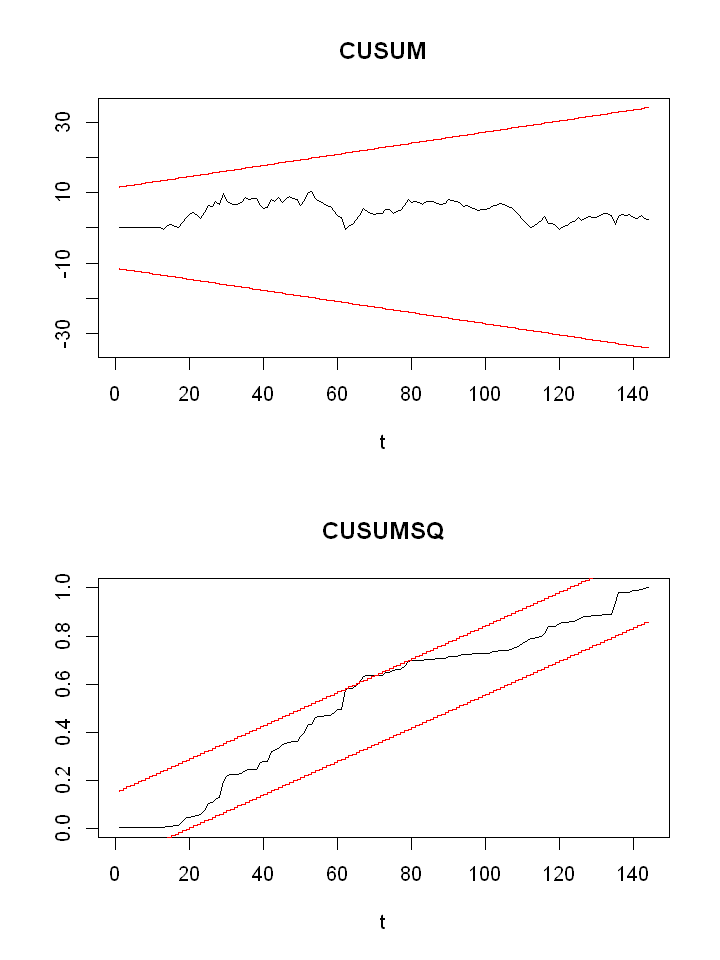

In [41]:
#Estadsíticas CUSUM
res=residuales
cum=cumsum(res)/sd(res)
N=length(res)
cumq=cumsum(res^2)/sum(res^2)
Af=0.948 ###Cuantil del 95% para la estad?stica cusum
co=0.14422####Valor del cuantil aproximado para cusumsq para n/2
LS=Af*sqrt(N)+2*Af*c(1:length(res))/sqrt(N)
LI=-LS
LQS=co+(1:length(res))/N
LQI=-co+(1:length(res))/N
options(repr.plot.width=6, repr.plot.height=8)
par(mfrow=c(2,1))
plot(cum,type="l",ylim=c(min(LI),max(LS)),xlab="t",ylab="",main="CUSUM")
lines(LS,type="S",col="red")
lines(LI,type="S",col="red")
#CUSUM Square
plot(cumq,type="l",xlab="t",ylab="",main="CUSUMSQ")                      
lines(LQS,type="S",col="red")                                                                           
lines(LQI,type="S",col="red")

## Pronósticos

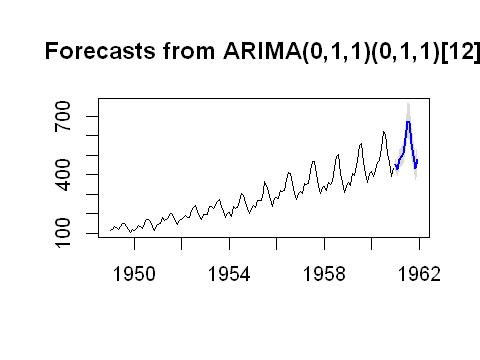

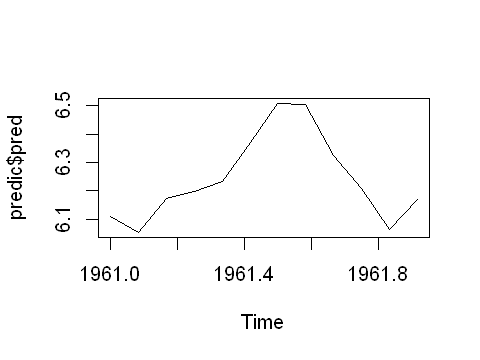

In [43]:
Pronosticos=forecast(modelo,h=12,level=0.95)
options(repr.plot.width=4, repr.plot.height=3) 
plot(Pronosticos)
predic<-predict(modelo,n.ahead=12)
plot(predic$pred)

## Comparación de pronósticos

In [45]:
library(fpp)
train <- window(AirPassengers,start=c(1949,01),end=c(1959,12))
test <- window(AirPassengers,start=c(1960,01),end=c(1960,12))
fitmodelo <- Arima(AirPassengers, c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12),lambda = 0)
refit <- Arima(AirPassengers, model=fitmodelo)
fc <- window(fitted(refit), start=c(1960,1))

window: Extracts a part from a 'timeSeries Object' 

train: muestra de entrenamiento ("aprendizaje") 

test: muestra para hacer pronósticos intra-muestra

In [46]:
h <- 1
train <- window(AirPassengers,start=c(1949,01),end=c(1959,12))
test <- window(AirPassengers,start=c(1960,01),end=c(1960,12))
n <- length(test) - h + 1
fitmodelo <- Arima(AirPassengers, c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12),lambda = 0)
fc <- ts(numeric(n), start=c(1960,01), freq=12)
for(i in 1:n)
{  
  x <- window(AirPassengers, end=c(1959, 12+(i-1)))
  refit <- Arima(x, model=fitmodelo)
  fc[i] <- forecast(refit, h=h)$mean[h]
}
dife=(test-fc)^2
ecm=(1/(length(test)))*sum(dife)
ecm

[1] 342.0955